In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
books=pd.read_csv("books.csv")
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
books.shape

(2000, 11)

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Apriori Algorithm 

# Associations Rule with 0.10% support and 0.70% confidence  interval

In [5]:
frequent_itemsets = apriori(books,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [6]:
rules=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)

In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


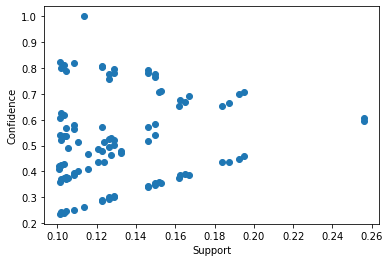

In [8]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [9]:
frequent_itemsets.sort_values('support',ascending=False).head(20)

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
10,0.2560,"(CookBks, ChildBks)"
1,0.2475,(YouthBks)
5,0.2410,(ArtBks)
4,0.2145,(RefBks)
14,0.1950,"(GeogBks, ChildBks)"
22,0.1925,"(GeogBks, CookBks)"


In [18]:
frequent_itemsets = apriori(books,min_support=0.19,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"
8,0.1950,"(GeogBks, ChildBks)"
9,0.1925,"(GeogBks, CookBks)"


In [19]:
rules1=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)

In [20]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
5,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


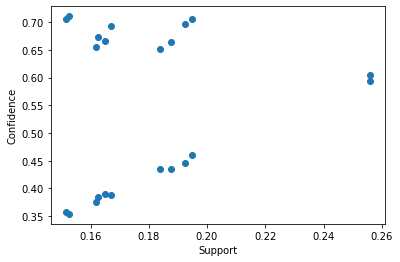

In [13]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [21]:
frequent_itemsets = apriori(books,min_support=0.10609,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [22]:
rules2=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.4)


In [23]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
67,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
68,"(GeogBks, CookBks)",(DoItYBks),0.1925,0.2820,0.1085,0.563636,1.998711,0.054215,1.645417
69,(DoItYBks),"(GeogBks, CookBks)",0.2820,0.1925,0.1085,0.384752,1.998711,0.054215,1.312478
70,(CookBks),"(DoItYBks, GeogBks)",0.4310,0.1325,0.1085,0.251740,1.899926,0.051392,1.159357


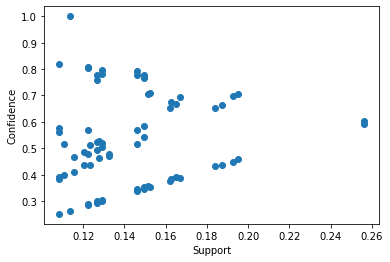

In [24]:
import matplotlib.pyplot as plt
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()